In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
train=pd.read_csv("../input/train.csv")

In [3]:
test=pd.read_csv("../input/test.csv")

In [4]:
train.shape

(595212, 59)

In [5]:
test.shape

(892816, 58)

In [6]:
train_test=pd.concat([train ,test])
train_test.shape

(1488028, 59)

In [7]:
train_test.head()

id  ps_calc_01  ps_calc_02  ps_calc_03  ps_calc_04  ps_calc_05  ps_calc_06  \
0   7         0.6         0.5         0.2           3           1          10   
1   9         0.3         0.1         0.3           2           1           9   
2  13         0.5         0.7         0.1           2           2           9   
3  16         0.6         0.9         0.1           2           4           7   
4  17         0.4         0.6         0.0           2           2           6   

   ps_calc_07  ps_calc_08  ps_calc_09   ...    ps_ind_13_bin  ps_ind_14  \
0           1          10           1   ...                0          0   
1           5           8           1   ...                0          0   
2           1           8           2   ...                0          0   
3           1           8           4   ...                0          0   
4           3          10           2   ...                0          0   

   ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  \
0         11              0              1              0        0.7   
1          3              0              0              1        0.8   
2         12              1              0              0        0.0   
3          8              1              0              0        0.9   
4          9              1              0              0        0.7   

   ps_reg_02  ps_reg_03  target  
0        0.2   0.718070     0.0  
1        0.4   0.766078     0.0  
2        0.0  -1.000000     0.0  
3        0.2   0.580948     0.0  
4        0.6   0.840759     0.0  

[5 rows x 59 columns]

# ps_reg_03

$I=(40*x)^2$

In [8]:
col='ps_reg_03'

In [9]:
train_test[col].dtype

dtype('float64')

In [10]:
s=(train_test[col]*40)**2

In [11]:
s2=np.round(s,0)

In [12]:
d=s-s2

In [13]:
d.min(),d.max()

(-6.3613697420805693e-07, 4.0987470129039139e-07)

In [14]:
def f(s):
    df=pd.DataFrame(s).reset_index()
    df=df.sort_values([col,'index'])
    return df

In [15]:
df1=f(s)
df2=f(s2)

In [16]:
(df1['index']==df2['index']).all()

True

so this transformation does not change the orders

$x=\frac{\sqrt{31M+A}}{40}$

In [17]:
def recon(reg):
    integer = int(np.round((40*reg)**2)) # gives 2364 for our example
    As=[]
    for a in range(31):
        if (integer - a) % 31 == 0:
            As.append(a)
    Ms = [(integer - A)//31 for A in As]
    assert len(As)>0
    if len(As)>1:
        print "Error {}, {}".format(reg,str(zip(As,Ms)))    
    return As[0], Ms[0]

In [18]:
recon(1.21552457811)

(8, 76)

In [19]:
s= train_test[col].map(recon)

no error printed, seems this decomposition is valid

In [20]:
ps_reg_03_feats=pd.concat([s.map(lambda u: u[0]),s.map(lambda u: u[1])],axis=1)

In [21]:
ps_reg_03_feats.columns=['ps_reg_03_A','ps_reg_03_M']

In [22]:
ps_reg_03_feats.head()

ps_reg_03_A  ps_reg_03_M
0           19           26
1            9           30
2           19           51
3           13           17
4           15           36

In [23]:
(ps_reg_03_feats.index==train_test.index).all()

True

In [24]:
for col in ps_reg_03_feats:
    train_test[col]=ps_reg_03_feats[col]

In [25]:
train_test=train_test.drop('ps_reg_03',axis=1)

# ps_car_15

In [26]:
col='ps_car_15'

In [27]:
train_test[col].value_counts()

3.605551    274652
3.464102    193489
3.316625    172457
3.162278    158611
3.741657    144341
2.828427    121489
3.000000    121435
2.645751     75228
2.449490     51194
2.236068     47989
0.000000     35259
2.000000     32167
1.732051     26804
1.000000     16474
1.414214     16439
Name: ps_car_15, dtype: int64

In [28]:
s1=np.array(list(set(train_test[col])))

In [29]:
s2=s1**2

In [30]:
d=s2-np.round(s2,0)

In [31]:
d.max(),d.min()

(2.9584512617475411e-10, -2.6157032095852628e-10)

In [32]:
ps_car_15_feat=np.round((train_test[col]**2),0).astype(np.int32)

In [33]:
(ps_car_15_feat.index==train_test.index).all()

True

In [34]:
train_test["ps_car_15"]=ps_car_15_feat

# combine_cols

In [35]:
cols=['ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin']

In [36]:
train_test[cols].sum(1).min(),train_test[cols].sum(1).max()

(1, 1)

In [37]:
s1=np.argmax(train_test[cols].values,1)

In [38]:
ps_ind_6789=pd.Series(s1,index=train_test.index,name='ps_ind_6789')

In [39]:
(ps_ind_6789.index==train_test.index).all()

True

In [40]:
train_test["ps_ind_6789"]=ps_ind_6789

# some float cols

In [41]:
cols=['ps_reg_01','ps_calc_02','ps_calc_03','ps_calc_01', 'ps_reg_02']

In [42]:
s1=train_test[cols]
s2=s1*10

In [43]:
(s2-np.round(s2,0)).min()

ps_reg_01     0.0
ps_calc_02    0.0
ps_calc_03    0.0
ps_calc_01    0.0
ps_reg_02     0.0
dtype: float64

In [44]:
(s2-np.round(s2,0)).max()

ps_reg_01     0.0
ps_calc_02    0.0
ps_calc_03    0.0
ps_calc_01    0.0
ps_reg_02     0.0
dtype: float64

In [45]:
for col in cols:
    train_test[col]=np.round(train_test[col]*10,0).astype(np.int64)

In [46]:
train_test[cols].min()


ps_reg_01     0
ps_calc_02    0
ps_calc_03    0
ps_calc_01    0
ps_reg_02     0
dtype: int64

In [47]:
train_test[cols].max()


ps_reg_01      9
ps_calc_02     9
ps_calc_03     9
ps_calc_01     9
ps_reg_02     18
dtype: int64

# float cols

In [48]:
import sklearn

In [49]:
sklearn.__version__

'0.19.0'

In [50]:
from sklearn.preprocessing import QuantileTransformer

In [51]:
quantile_transformer = QuantileTransformer(output_distribution='uniform')

In [52]:
vc=train_test['ps_car_12'].value_counts()
vc.shape

(214,)

In [53]:
s=train_test['ps_car_12']

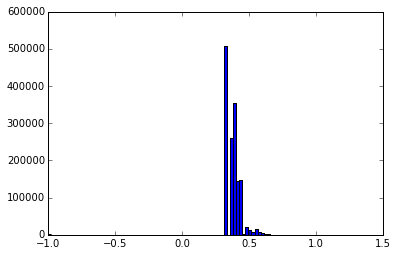

In [56]:
plt.hist(s.values,bins=100);

In [57]:
qs = quantile_transformer.fit_transform(s.values.reshape(-1,1))

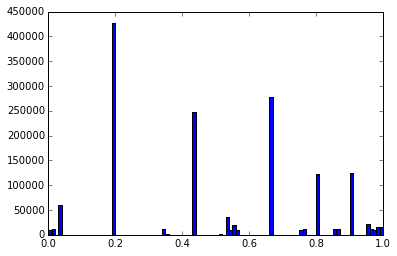

In [58]:
plt.hist(qs,bins=100);

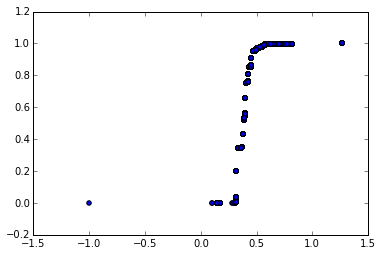

In [59]:
plt.scatter(s.values,qs);

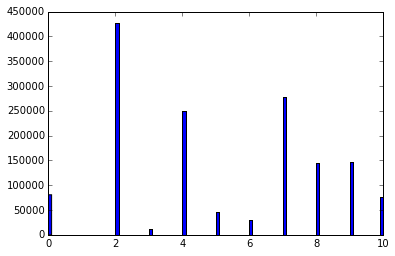

In [60]:
plt.hist(np.round(qs*10),bins=100);

In [61]:
train_test['ps_car_12_float']=train_test['ps_car_12']

In [62]:
train_test['ps_car_12']=np.round(qs*10).astype(np.int)

In [63]:
vc=train_test['ps_car_13'].value_counts()
vc.shape

(104192,)

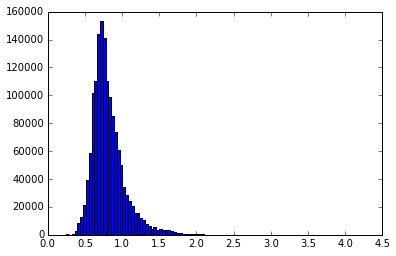

In [65]:
plt.hist(train_test['ps_car_13'].values,bins=100);

In [66]:
s=train_test['ps_car_13']

In [67]:
qs = quantile_transformer.fit_transform(s.values.reshape(-1,1))

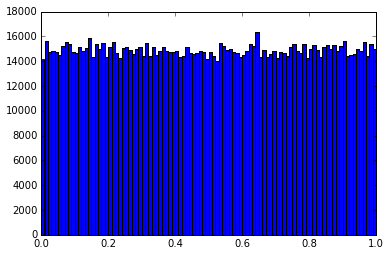

In [68]:
plt.hist(qs,bins=100);

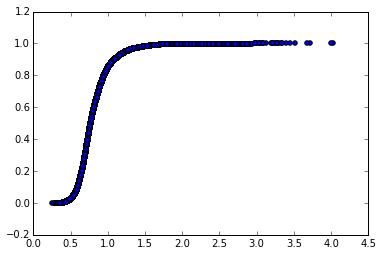

In [69]:
plt.scatter(s.values,qs);

In [70]:
train_test['ps_car_13_float']=train_test['ps_car_13']

In [71]:
train_test['ps_car_13']=np.round(qs*10).astype(np.int)

In [72]:
vc=train_test['ps_car_14'].value_counts()
vc.shape

(905,)

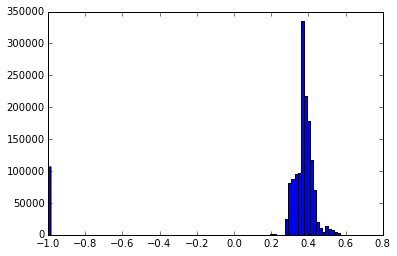

In [74]:
plt.hist(train_test['ps_car_14'].values,bins=100);

In [75]:
s=train_test['ps_car_14']

In [76]:
qs = quantile_transformer.fit_transform(s.values.reshape(-1,1))

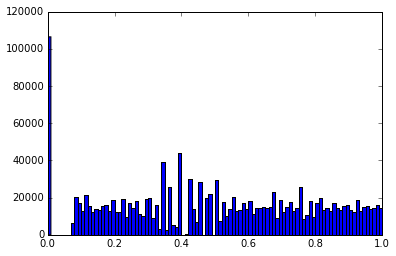

In [77]:
plt.hist(qs,bins=100);

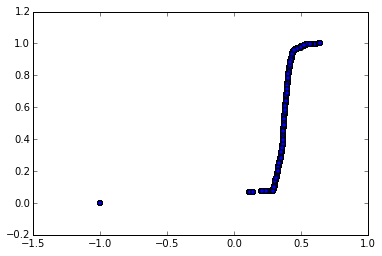

In [78]:
plt.scatter(s.values,qs);

In [79]:
train_test['ps_car_14_float']=train_test['ps_car_14']

In [80]:
train_test['ps_car_14']=np.round(qs*10).astype(np.int)

# make new data

In [81]:
train_test['target']=train_test['target'].fillna(-1).astype(np.int)

In [82]:
train_test.head()

id  ps_calc_01  ps_calc_02  ps_calc_03  ps_calc_04  ps_calc_05  ps_calc_06  \
0   7           6           5           2           3           1          10   
1   9           3           1           3           2           1           9   
2  13           5           7           1           2           2           9   
3  16           6           9           1           2           4           7   
4  17           4           6           0           2           2           6   

   ps_calc_07  ps_calc_08  ps_calc_09       ...         ps_ind_18_bin  \
0           1          10           1       ...                     0   
1           5           8           1       ...                     1   
2           1           8           2       ...                     0   
3           1           8           4       ...                     0   
4           3          10           2       ...                     0   

   ps_reg_01  ps_reg_02  target  ps_reg_03_A  ps_reg_03_M  ps_ind_6789  \
0          7          2       0           19           26            1   
1          8          4       0            9           30            2   
2          0          0       0           19           51            2   
3          9          2       0           13           17            0   
4          7          6       0           15           36            0   

   ps_car_12_float  ps_car_13_float  ps_car_14_float  
0         0.400000         0.883679         0.370810  
1         0.316228         0.618817         0.388716  
2         0.316228         0.641586         0.347275  
3         0.374166         0.542949         0.294958  
4         0.316070         0.565832         0.365103  

[5 rows x 64 columns]

In [83]:
ps_cols=sorted([u for u in train_test.columns if u.startswith('ps_')])

In [84]:
newcols=["id"]+ps_cols+['target']

In [85]:
len(newcols),len(train_test.columns)

(64, 64)

In [86]:
train_test=train_test[newcols]

In [87]:
train_test.head()

id  ps_calc_01  ps_calc_02  ps_calc_03  ps_calc_04  ps_calc_05  ps_calc_06  \
0   7           6           5           2           3           1          10   
1   9           3           1           3           2           1           9   
2  13           5           7           1           2           2           9   
3  16           6           9           1           2           4           7   
4  17           4           6           0           2           2           6   

   ps_calc_07  ps_calc_08  ps_calc_09   ...    ps_ind_15  ps_ind_16_bin  \
0           1          10           1   ...           11              0   
1           5           8           1   ...            3              0   
2           1           8           2   ...           12              1   
3           1           8           4   ...            8              1   
4           3          10           2   ...            9              1   

   ps_ind_17_bin  ps_ind_18_bin  ps_ind_6789  ps_reg_01  ps_reg_02  \
0              1              0            1          7          2   
1              0              1            2          8          4   
2              0              0            2          0          0   
3              0              0            0          9          2   
4              0              0            0          7          6   

   ps_reg_03_A  ps_reg_03_M  target  
0           19           26       0  
1            9           30       0  
2           19           51       0  
3           13           17       0  
4           15           36       0  

[5 rows x 64 columns]

In [88]:
newtrain=train_test.iloc[:train.shape[0]]

In [89]:
newtest=train_test.iloc[train.shape[0]:]

In [90]:
train.shape,newtrain.shape,test.shape,newtest.shape

((595212, 59), (595212, 64), (892816, 58), (892816, 64))

In [91]:
newtrain.to_csv("../input/newtrain.csv",index=None)

In [92]:
newtest.to_csv("../input/newtest.csv",index=None)